In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import clamped_beam as cbe
import sys

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint
import tensorflow as tf

configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

FEM: end displacement is 62.5 mm, rotation 5.371 deg
MBD: end displacement is 61.972 mm, rotation 5.335 deg
1001
done simulating!
               0             1             2    3             4   \
0    0.000000e+00  0.000000e+00  0.000000e+00  1.0  0.000000e+00   
1    0.000000e+00  0.000000e+00  5.104682e-27  1.0  3.708696e-45   
2    0.000000e+00  0.000000e+00  3.049981e-25  1.0  1.132664e-41   
3    0.000000e+00  0.000000e+00  7.769365e-25  1.0 -1.633543e-42   
4    0.000000e+00  0.000000e+00  1.016374e-24  1.0 -2.484527e-41   
..            ...           ...           ...  ...           ...   
995  5.613601e-25 -1.979512e-18  2.460251e-09  1.0 -2.167892e-18   
996  5.653836e-25 -1.982965e-18  2.569992e-09  1.0 -2.034565e-18   
997  5.692659e-25 -1.986418e-18  2.679728e-09  1.0 -1.908493e-18   
998  5.731482e-25 -1.989871e-18  2.784808e-09  1.0 -1.788464e-18   
999  5.770256e-25 -1.993324e-18  2.884816e-09  1.0 -1.671712e-18   

               5             6         7             

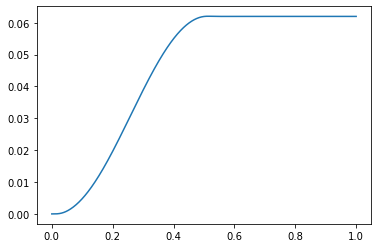

In [2]:
### Creating dataset from data points ###

n_elem = 40
l = 1
h = 0.02
E = 2e11
nu = 0.3
rho = 7801
Fy = 500.0


vals = cbe.generate(n_elem, l, h, E, nu, rho, Fy) ## Generating the training data with separate module #
#vals2 = cbe.generate(n_elem, l, h, E, nu, rho, Fy=700) ## Generating the secound set of data       #
print ("done simulating!")



dframe = pd.DataFrame() ##Creating Pandas DF from data ##

for i in range(len(vals[0])):
       dframe[i] = pd.DataFrame(vals[0][i])
        
dframe[50] = pd.DataFrame(vals[1])
#print (dframe)

# ### Suffle and split data to val and train data ###
# dframe_train, validate = \
#               np.split(dframe.sample(frac=1, random_state=42), 
#                        [int(.9*len(dframe))])


# Y = dframe_train.[:-1]
# X = dframe_train

X = dframe.drop(0)
Y = dframe.drop(dframe.shape[0]-1)

print (Y)
print (X)


# x_val = validate 
# y_val = x_val[50] ## Select matching val data for y_val ##
# validation_data=(x_val, y_val)

In [3]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [4]:
### CREATING NN MODEL ###

model=Sequential([Dense(51,input_shape=(51,), activation="softplus"),
                  Dense(60,activation="softplus"),
                  Dense(80,activation="softplus"),
                  Dense(60,activation="softplus"),  
                  Dense(51)])

model.compile(Adam(lr=0.001),loss=custom_loss)

In [5]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=2000, validation_split = 0.1)

##callbacks= [keras.callbacks.EarlyStopping(patience=5)],

Epoch 1/2000
29/29 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0023
Epoch 2/2000
29/29 [==============================] - 0s 707us/step - loss: 9.7467e-04 - val_loss: 2.2505e-04
Epoch 3/2000
29/29 [==============================] - 0s 690us/step - loss: 1.1177e-04 - val_loss: 6.2534e-05
Epoch 4/2000
29/29 [==============================] - 0s 724us/step - loss: 6.5164e-05 - val_loss: 4.1219e-05
Epoch 5/2000
29/29 [==============================] - 0s 724us/step - loss: 6.4119e-05 - val_loss: 4.2993e-05
Epoch 6/2000
29/29 [==============================] - 0s 690us/step - loss: 6.2791e-05 - val_loss: 5.5587e-05
Epoch 7/2000
29/29 [==============================] - 0s 790us/step - loss: 6.2372e-05 - val_loss: 4.4813e-05
Epoch 8/2000
29/29 [==============================] - 0s 765us/step - loss: 6.3234e-05 - val_loss: 3.9974e-05
Epoch 9/2000
29/29 [==============================] - 0s 776us/step - loss: 6.2589e-05 - val_loss: 4.7550e-05
Epoch 10/2000
29/29 

Epoch 75/2000
29/29 [==============================] - 0s 741us/step - loss: 1.7636e-05 - val_loss: 1.7781e-05
Epoch 76/2000
29/29 [==============================] - 0s 724us/step - loss: 1.6810e-05 - val_loss: 8.3887e-06
Epoch 77/2000
29/29 [==============================] - 0s 724us/step - loss: 1.5807e-05 - val_loss: 1.2456e-05
Epoch 78/2000
29/29 [==============================] - 0s 724us/step - loss: 1.5373e-05 - val_loss: 8.3630e-06
Epoch 79/2000
29/29 [==============================] - 0s 707us/step - loss: 1.4304e-05 - val_loss: 1.1134e-05
Epoch 80/2000
29/29 [==============================] - 0s 741us/step - loss: 1.3491e-05 - val_loss: 5.5184e-06
Epoch 81/2000
29/29 [==============================] - 0s 724us/step - loss: 1.3105e-05 - val_loss: 5.4210e-06
Epoch 82/2000
29/29 [==============================] - 0s 707us/step - loss: 1.2536e-05 - val_loss: 8.3789e-06
Epoch 83/2000
29/29 [==============================] - 0s 707us/step - loss: 1.2114e-05 - val_loss: 7.2853e-06
E

29/29 [==============================] - 0s 845us/step - loss: 3.9331e-06 - val_loss: 1.0701e-06
Epoch 149/2000
29/29 [==============================] - 0s 759us/step - loss: 4.0068e-06 - val_loss: 2.9861e-07
Epoch 150/2000
29/29 [==============================] - 0s 724us/step - loss: 3.9662e-06 - val_loss: 1.0805e-05
Epoch 151/2000
29/29 [==============================] - 0s 759us/step - loss: 6.3053e-06 - val_loss: 1.9182e-06
Epoch 152/2000
29/29 [==============================] - 0s 762us/step - loss: 4.1903e-06 - val_loss: 1.6790e-06
Epoch 153/2000
29/29 [==============================] - 0s 724us/step - loss: 4.2213e-06 - val_loss: 1.0231e-06
Epoch 154/2000
29/29 [==============================] - 0s 759us/step - loss: 4.2124e-06 - val_loss: 1.1709e-06
Epoch 155/2000
29/29 [==============================] - 0s 759us/step - loss: 4.3818e-06 - val_loss: 1.7808e-06
Epoch 156/2000
29/29 [==============================] - 0s 741us/step - loss: 4.3544e-06 - val_loss: 4.6154e-07
Epoch 1

29/29 [==============================] - 0s 707us/step - loss: 3.5311e-06 - val_loss: 2.0643e-06
Epoch 222/2000
29/29 [==============================] - 0s 690us/step - loss: 4.7664e-06 - val_loss: 1.4664e-06
Epoch 223/2000
29/29 [==============================] - 0s 690us/step - loss: 3.4378e-06 - val_loss: 1.6909e-06
Epoch 224/2000
29/29 [==============================] - 0s 724us/step - loss: 3.4998e-06 - val_loss: 8.8987e-06
Epoch 225/2000
29/29 [==============================] - 0s 707us/step - loss: 6.3374e-06 - val_loss: 5.5166e-06
Epoch 226/2000
29/29 [==============================] - 0s 828us/step - loss: 4.1913e-06 - val_loss: 1.5483e-06
Epoch 227/2000
29/29 [==============================] - 0s 845us/step - loss: 2.9671e-06 - val_loss: 1.7190e-06
Epoch 228/2000
29/29 [==============================] - 0s 828us/step - loss: 3.0682e-06 - val_loss: 4.0295e-06
Epoch 229/2000
29/29 [==============================] - 0s 810us/step - loss: 3.1408e-06 - val_loss: 5.3595e-06
Epoch 2

29/29 [==============================] - 0s 759us/step - loss: 1.6741e-06 - val_loss: 1.6739e-06
Epoch 295/2000
29/29 [==============================] - 0s 736us/step - loss: 3.2348e-06 - val_loss: 6.0257e-07
Epoch 296/2000
29/29 [==============================] - 0s 759us/step - loss: 1.4259e-06 - val_loss: 8.2486e-07
Epoch 297/2000
29/29 [==============================] - 0s 724us/step - loss: 2.4097e-06 - val_loss: 4.6305e-06
Epoch 298/2000
29/29 [==============================] - 0s 724us/step - loss: 2.4064e-06 - val_loss: 4.6802e-07
Epoch 299/2000
29/29 [==============================] - 0s 707us/step - loss: 1.4465e-06 - val_loss: 6.5349e-07
Epoch 300/2000
29/29 [==============================] - 0s 724us/step - loss: 3.6569e-06 - val_loss: 2.3521e-06
Epoch 301/2000
29/29 [==============================] - 0s 707us/step - loss: 1.6748e-06 - val_loss: 6.9568e-07
Epoch 302/2000
29/29 [==============================] - 0s 741us/step - loss: 1.2760e-06 - val_loss: 1.0538e-06
Epoch 3

29/29 [==============================] - 0s 828us/step - loss: 4.4505e-07 - val_loss: 7.9175e-07
Epoch 368/2000
29/29 [==============================] - 0s 776us/step - loss: 7.5405e-07 - val_loss: 2.6643e-07
Epoch 369/2000
29/29 [==============================] - 0s 769us/step - loss: 1.7251e-06 - val_loss: 1.4897e-06
Epoch 370/2000
29/29 [==============================] - 0s 759us/step - loss: 1.1289e-06 - val_loss: 7.8749e-07
Epoch 371/2000
29/29 [==============================] - 0s 732us/step - loss: 3.3469e-07 - val_loss: 2.1240e-07
Epoch 372/2000
29/29 [==============================] - 0s 801us/step - loss: 2.2228e-06 - val_loss: 2.4174e-06
Epoch 373/2000
29/29 [==============================] - 0s 759us/step - loss: 1.4082e-06 - val_loss: 8.8015e-07
Epoch 374/2000
29/29 [==============================] - 0s 810us/step - loss: 5.1144e-07 - val_loss: 3.5902e-07
Epoch 375/2000
29/29 [==============================] - 0s 719us/step - loss: 1.1207e-06 - val_loss: 5.1203e-07
Epoch 3

29/29 [==============================] - 0s 724us/step - loss: 3.9074e-07 - val_loss: 1.2168e-07
Epoch 441/2000
29/29 [==============================] - 0s 707us/step - loss: 3.9982e-07 - val_loss: 1.0038e-06
Epoch 442/2000
29/29 [==============================] - 0s 793us/step - loss: 1.1486e-06 - val_loss: 3.9107e-07
Epoch 443/2000
29/29 [==============================] - 0s 793us/step - loss: 2.4491e-07 - val_loss: 2.3818e-07
Epoch 444/2000
29/29 [==============================] - 0s 793us/step - loss: 1.2553e-06 - val_loss: 7.5228e-07
Epoch 445/2000
29/29 [==============================] - 0s 810us/step - loss: 7.7798e-07 - val_loss: 4.0889e-07
Epoch 446/2000
29/29 [==============================] - 0s 769us/step - loss: 3.8953e-07 - val_loss: 2.7117e-07
Epoch 447/2000
29/29 [==============================] - 0s 828us/step - loss: 3.3715e-07 - val_loss: 1.2889e-06
Epoch 448/2000
29/29 [==============================] - 0s 707us/step - loss: 1.0307e-06 - val_loss: 7.6095e-07
Epoch 4

29/29 [==============================] - 0s 724us/step - loss: 6.6199e-07 - val_loss: 4.5476e-07
Epoch 514/2000
29/29 [==============================] - 0s 724us/step - loss: 5.5384e-07 - val_loss: 4.4256e-07
Epoch 515/2000
29/29 [==============================] - 0s 707us/step - loss: 9.7408e-07 - val_loss: 6.2292e-07
Epoch 516/2000
29/29 [==============================] - 0s 668us/step - loss: 4.2922e-07 - val_loss: 1.3130e-07
Epoch 517/2000
29/29 [==============================] - 0s 707us/step - loss: 5.0442e-07 - val_loss: 1.8296e-06
Epoch 518/2000
29/29 [==============================] - 0s 724us/step - loss: 7.0662e-07 - val_loss: 2.0843e-07
Epoch 519/2000
29/29 [==============================] - 0s 724us/step - loss: 1.9337e-07 - val_loss: 5.0867e-07
Epoch 520/2000
29/29 [==============================] - 0s 707us/step - loss: 4.2234e-07 - val_loss: 2.4823e-07
Epoch 521/2000
29/29 [==============================] - 0s 724us/step - loss: 6.9890e-07 - val_loss: 1.2515e-06
Epoch 5

29/29 [==============================] - 0s 776us/step - loss: 1.9675e-07 - val_loss: 1.8279e-07
Epoch 587/2000
29/29 [==============================] - 0s 828us/step - loss: 5.7549e-07 - val_loss: 1.4890e-06
Epoch 588/2000
29/29 [==============================] - 0s 828us/step - loss: 5.5196e-07 - val_loss: 2.6222e-07
Epoch 589/2000
29/29 [==============================] - 0s 828us/step - loss: 2.1260e-07 - val_loss: 2.1267e-07
Epoch 590/2000
29/29 [==============================] - 0s 828us/step - loss: 3.4187e-07 - val_loss: 6.5152e-07
Epoch 591/2000
29/29 [==============================] - 0s 759us/step - loss: 8.0177e-07 - val_loss: 4.9130e-07
Epoch 592/2000
29/29 [==============================] - 0s 810us/step - loss: 2.7004e-07 - val_loss: 4.2413e-07
Epoch 593/2000
29/29 [==============================] - 0s 759us/step - loss: 4.0823e-07 - val_loss: 3.0501e-07
Epoch 594/2000
29/29 [==============================] - 0s 741us/step - loss: 2.3908e-07 - val_loss: 2.2948e-07
Epoch 5

29/29 [==============================] - 0s 672us/step - loss: 2.3934e-07 - val_loss: 2.0052e-07
Epoch 660/2000
29/29 [==============================] - 0s 690us/step - loss: 3.1985e-07 - val_loss: 2.5637e-07
Epoch 661/2000
29/29 [==============================] - 0s 690us/step - loss: 2.4578e-07 - val_loss: 5.8895e-08
Epoch 662/2000
29/29 [==============================] - 0s 759us/step - loss: 4.9589e-07 - val_loss: 4.5639e-07
Epoch 663/2000
29/29 [==============================] - 0s 830us/step - loss: 3.1759e-07 - val_loss: 2.6874e-07
Epoch 664/2000
29/29 [==============================] - 0s 828us/step - loss: 3.7897e-07 - val_loss: 5.0949e-07
Epoch 665/2000
29/29 [==============================] - 0s 772us/step - loss: 5.1317e-07 - val_loss: 5.6607e-08
Epoch 666/2000
29/29 [==============================] - 0s 828us/step - loss: 1.2300e-07 - val_loss: 8.5733e-08
Epoch 667/2000
29/29 [==============================] - 0s 759us/step - loss: 1.8534e-07 - val_loss: 3.5055e-07
Epoch 6

29/29 [==============================] - 0s 724us/step - loss: 2.2047e-07 - val_loss: 1.9879e-07
Epoch 733/2000
29/29 [==============================] - 0s 741us/step - loss: 3.4529e-07 - val_loss: 3.5742e-07
Epoch 734/2000
29/29 [==============================] - 0s 724us/step - loss: 2.1547e-07 - val_loss: 8.5234e-08
Epoch 735/2000
29/29 [==============================] - 0s 707us/step - loss: 2.1990e-07 - val_loss: 5.8872e-07
Epoch 736/2000
29/29 [==============================] - 0s 724us/step - loss: 1.9497e-07 - val_loss: 9.6064e-08
Epoch 737/2000
29/29 [==============================] - 0s 724us/step - loss: 4.4434e-07 - val_loss: 4.1757e-07
Epoch 738/2000
29/29 [==============================] - 0s 707us/step - loss: 2.0286e-07 - val_loss: 1.0449e-07
Epoch 739/2000
29/29 [==============================] - 0s 690us/step - loss: 2.1990e-07 - val_loss: 4.0401e-07
Epoch 740/2000
29/29 [==============================] - 0s 690us/step - loss: 1.9644e-07 - val_loss: 1.1817e-07
Epoch 7

29/29 [==============================] - 0s 756us/step - loss: 4.0993e-07 - val_loss: 8.9275e-08
Epoch 806/2000
29/29 [==============================] - 0s 759us/step - loss: 1.5930e-07 - val_loss: 1.7113e-07
Epoch 807/2000
29/29 [==============================] - 0s 741us/step - loss: 1.7245e-07 - val_loss: 2.8599e-07
Epoch 808/2000
29/29 [==============================] - 0s 776us/step - loss: 2.2601e-07 - val_loss: 2.6111e-07
Epoch 809/2000
29/29 [==============================] - 0s 776us/step - loss: 3.2227e-07 - val_loss: 3.0828e-07
Epoch 810/2000
29/29 [==============================] - 0s 741us/step - loss: 2.9126e-07 - val_loss: 1.4369e-07
Epoch 811/2000
29/29 [==============================] - 0s 741us/step - loss: 2.7099e-07 - val_loss: 6.7246e-07
Epoch 812/2000
29/29 [==============================] - 0s 772us/step - loss: 2.3684e-07 - val_loss: 1.3840e-07
Epoch 813/2000
29/29 [==============================] - 0s 739us/step - loss: 1.2066e-07 - val_loss: 3.0622e-07
Epoch 8

29/29 [==============================] - 0s 690us/step - loss: 1.8115e-07 - val_loss: 2.3889e-07
Epoch 879/2000
29/29 [==============================] - 0s 724us/step - loss: 1.5326e-07 - val_loss: 9.5838e-08
Epoch 880/2000
29/29 [==============================] - 0s 724us/step - loss: 9.3417e-08 - val_loss: 1.2677e-07
Epoch 881/2000
29/29 [==============================] - 0s 690us/step - loss: 4.7474e-07 - val_loss: 2.3123e-07
Epoch 882/2000
29/29 [==============================] - 0s 724us/step - loss: 1.7034e-07 - val_loss: 9.7165e-08
Epoch 883/2000
29/29 [==============================] - 0s 724us/step - loss: 2.2762e-07 - val_loss: 1.7777e-07
Epoch 884/2000
29/29 [==============================] - 0s 741us/step - loss: 1.5246e-07 - val_loss: 1.8672e-07
Epoch 885/2000
29/29 [==============================] - 0s 810us/step - loss: 2.5154e-07 - val_loss: 2.3567e-07
Epoch 886/2000
29/29 [==============================] - 0s 810us/step - loss: 2.4990e-07 - val_loss: 2.1485e-07
Epoch 8

29/29 [==============================] - 0s 759us/step - loss: 1.6376e-07 - val_loss: 6.7725e-08
Epoch 952/2000
29/29 [==============================] - 0s 776us/step - loss: 1.1284e-07 - val_loss: 5.8455e-07
Epoch 953/2000
29/29 [==============================] - 0s 724us/step - loss: 4.3662e-07 - val_loss: 1.6270e-07
Epoch 954/2000
29/29 [==============================] - 0s 724us/step - loss: 1.0525e-07 - val_loss: 8.2915e-08
Epoch 955/2000
29/29 [==============================] - 0s 724us/step - loss: 1.8239e-07 - val_loss: 1.0645e-07
Epoch 956/2000
29/29 [==============================] - 0s 724us/step - loss: 8.9462e-08 - val_loss: 1.8199e-07
Epoch 957/2000
29/29 [==============================] - 0s 707us/step - loss: 1.5357e-07 - val_loss: 1.9299e-07
Epoch 958/2000
29/29 [==============================] - 0s 724us/step - loss: 1.7603e-07 - val_loss: 3.7386e-07
Epoch 959/2000
29/29 [==============================] - 0s 707us/step - loss: 2.7889e-07 - val_loss: 9.2517e-08
Epoch 9

29/29 [==============================] - 0s 810us/step - loss: 3.4009e-07 - val_loss: 1.1107e-07
Epoch 1025/2000
29/29 [==============================] - 0s 828us/step - loss: 1.1267e-07 - val_loss: 4.5179e-08
Epoch 1026/2000
29/29 [==============================] - 0s 724us/step - loss: 1.3916e-07 - val_loss: 1.3875e-07
Epoch 1027/2000
29/29 [==============================] - 0s 741us/step - loss: 1.6036e-07 - val_loss: 1.1523e-07
Epoch 1028/2000
29/29 [==============================] - 0s 793us/step - loss: 1.5957e-07 - val_loss: 1.0009e-07
Epoch 1029/2000
29/29 [==============================] - 0s 810us/step - loss: 1.9678e-07 - val_loss: 1.1392e-07
Epoch 1030/2000
29/29 [==============================] - 0s 845us/step - loss: 2.2547e-07 - val_loss: 8.1413e-08
Epoch 1031/2000
29/29 [==============================] - 0s 776us/step - loss: 7.7188e-08 - val_loss: 1.0573e-07
Epoch 1032/2000
29/29 [==============================] - 0s 828us/step - loss: 2.7341e-07 - val_loss: 1.3738e-07

29/29 [==============================] - 0s 707us/step - loss: 2.2118e-07 - val_loss: 5.6273e-08
Epoch 1097/2000
29/29 [==============================] - 0s 741us/step - loss: 1.0820e-07 - val_loss: 3.6359e-07
Epoch 1098/2000
29/29 [==============================] - 0s 724us/step - loss: 2.4034e-07 - val_loss: 6.4620e-08
Epoch 1099/2000
29/29 [==============================] - 0s 707us/step - loss: 5.7770e-08 - val_loss: 8.8946e-08
Epoch 1100/2000
29/29 [==============================] - 0s 724us/step - loss: 1.4796e-07 - val_loss: 2.5759e-07
Epoch 1101/2000
29/29 [==============================] - 0s 724us/step - loss: 1.9729e-07 - val_loss: 2.0446e-07
Epoch 1102/2000
29/29 [==============================] - 0s 759us/step - loss: 1.5290e-07 - val_loss: 1.0152e-07
Epoch 1103/2000
29/29 [==============================] - 0s 759us/step - loss: 2.2525e-07 - val_loss: 4.1200e-08
Epoch 1104/2000
29/29 [==============================] - 0s 776us/step - loss: 1.4010e-07 - val_loss: 1.6270e-07

29/29 [==============================] - 0s 741us/step - loss: 1.6354e-07 - val_loss: 6.0985e-08
Epoch 1169/2000
29/29 [==============================] - 0s 810us/step - loss: 1.0888e-07 - val_loss: 7.5343e-08
Epoch 1170/2000
29/29 [==============================] - 0s 776us/step - loss: 1.7509e-07 - val_loss: 2.1066e-07
Epoch 1171/2000
29/29 [==============================] - 0s 741us/step - loss: 1.7350e-07 - val_loss: 1.8843e-07
Epoch 1172/2000
29/29 [==============================] - 0s 707us/step - loss: 1.2614e-07 - val_loss: 6.8587e-08
Epoch 1173/2000
29/29 [==============================] - 0s 690us/step - loss: 1.3299e-07 - val_loss: 1.9709e-07
Epoch 1174/2000
29/29 [==============================] - 0s 707us/step - loss: 1.7764e-07 - val_loss: 1.6196e-07
Epoch 1175/2000
29/29 [==============================] - 0s 690us/step - loss: 1.0820e-07 - val_loss: 7.6483e-08
Epoch 1176/2000
29/29 [==============================] - 0s 707us/step - loss: 2.1546e-07 - val_loss: 2.0612e-07

29/29 [==============================] - 0s 793us/step - loss: 2.0171e-07 - val_loss: 6.0634e-08
Epoch 1241/2000
29/29 [==============================] - 0s 759us/step - loss: 6.6794e-08 - val_loss: 4.0455e-08
Epoch 1242/2000
29/29 [==============================] - 0s 828us/step - loss: 1.5669e-07 - val_loss: 4.0794e-07
Epoch 1243/2000
29/29 [==============================] - 0s 862us/step - loss: 2.8945e-07 - val_loss: 6.1432e-08
Epoch 1244/2000
29/29 [==============================] - 0s 845us/step - loss: 3.7786e-08 - val_loss: 8.7438e-08
Epoch 1245/2000
29/29 [==============================] - 0s 759us/step - loss: 9.0835e-08 - val_loss: 6.8126e-08
Epoch 1246/2000
29/29 [==============================] - 0s 724us/step - loss: 2.2894e-07 - val_loss: 1.9040e-07
Epoch 1247/2000
29/29 [==============================] - 0s 793us/step - loss: 1.8013e-07 - val_loss: 7.9649e-08
Epoch 1248/2000
29/29 [==============================] - 0s 810us/step - loss: 8.1460e-08 - val_loss: 6.4422e-08

29/29 [==============================] - 0s 741us/step - loss: 7.4973e-08 - val_loss: 9.7093e-08
Epoch 1313/2000
29/29 [==============================] - 0s 741us/step - loss: 1.6565e-07 - val_loss: 2.1210e-07
Epoch 1314/2000
29/29 [==============================] - 0s 724us/step - loss: 1.4750e-07 - val_loss: 5.0544e-08
Epoch 1315/2000
29/29 [==============================] - 0s 690us/step - loss: 7.4374e-08 - val_loss: 5.8921e-08
Epoch 1316/2000
29/29 [==============================] - 0s 690us/step - loss: 7.8478e-08 - val_loss: 3.2809e-07
Epoch 1317/2000
29/29 [==============================] - 0s 707us/step - loss: 2.7088e-07 - val_loss: 6.2944e-08
Epoch 1318/2000
29/29 [==============================] - 0s 741us/step - loss: 1.2180e-07 - val_loss: 1.5459e-07
Epoch 1319/2000
29/29 [==============================] - 0s 810us/step - loss: 1.0523e-07 - val_loss: 1.4034e-07
Epoch 1320/2000
29/29 [==============================] - 0s 817us/step - loss: 6.7667e-08 - val_loss: 1.1747e-07

29/29 [==============================] - 0s 780us/step - loss: 7.6035e-08 - val_loss: 5.0481e-08
Epoch 1385/2000
29/29 [==============================] - 0s 759us/step - loss: 7.7337e-08 - val_loss: 3.3972e-07
Epoch 1386/2000
29/29 [==============================] - 0s 759us/step - loss: 1.4923e-07 - val_loss: 1.4380e-07
Epoch 1387/2000
29/29 [==============================] - 0s 724us/step - loss: 2.2229e-07 - val_loss: 2.2048e-07
Epoch 1388/2000
29/29 [==============================] - 0s 741us/step - loss: 7.6097e-08 - val_loss: 3.4163e-08
Epoch 1389/2000
29/29 [==============================] - 0s 724us/step - loss: 5.2112e-08 - val_loss: 3.0881e-08
Epoch 1390/2000
29/29 [==============================] - 0s 686us/step - loss: 1.1706e-07 - val_loss: 2.2746e-07
Epoch 1391/2000
29/29 [==============================] - 0s 724us/step - loss: 2.0720e-07 - val_loss: 1.6226e-07
Epoch 1392/2000
29/29 [==============================] - 0s 724us/step - loss: 1.2794e-07 - val_loss: 1.6055e-07

29/29 [==============================] - 0s 776us/step - loss: 6.1848e-08 - val_loss: 9.0175e-08
Epoch 1457/2000
29/29 [==============================] - 0s 845us/step - loss: 2.0355e-07 - val_loss: 8.1505e-08
Epoch 1458/2000
29/29 [==============================] - 0s 741us/step - loss: 1.3643e-07 - val_loss: 7.2204e-08
Epoch 1459/2000
29/29 [==============================] - 0s 741us/step - loss: 6.1679e-08 - val_loss: 1.1491e-07
Epoch 1460/2000
29/29 [==============================] - 0s 845us/step - loss: 1.1262e-07 - val_loss: 1.7592e-07
Epoch 1461/2000
29/29 [==============================] - 0s 754us/step - loss: 2.2866e-07 - val_loss: 1.5027e-07
Epoch 1462/2000
29/29 [==============================] - 0s 759us/step - loss: 7.3686e-08 - val_loss: 2.2616e-08
Epoch 1463/2000
29/29 [==============================] - 0s 828us/step - loss: 2.2664e-08 - val_loss: 6.4225e-08
Epoch 1464/2000
29/29 [==============================] - 0s 818us/step - loss: 1.7530e-07 - val_loss: 8.2534e-08

29/29 [==============================] - 0s 741us/step - loss: 1.1604e-07 - val_loss: 5.1634e-08
Epoch 1529/2000
29/29 [==============================] - 0s 741us/step - loss: 2.9463e-08 - val_loss: 2.7344e-08
Epoch 1530/2000
29/29 [==============================] - 0s 707us/step - loss: 6.7014e-08 - val_loss: 1.9238e-07
Epoch 1531/2000
29/29 [==============================] - 0s 724us/step - loss: 2.0091e-07 - val_loss: 4.6763e-08
Epoch 1532/2000
29/29 [==============================] - 0s 741us/step - loss: 6.5815e-08 - val_loss: 4.0967e-08
Epoch 1533/2000
29/29 [==============================] - 0s 724us/step - loss: 5.1480e-08 - val_loss: 6.3078e-08
Epoch 1534/2000
29/29 [==============================] - 0s 707us/step - loss: 8.2143e-08 - val_loss: 4.0263e-08
Epoch 1535/2000
29/29 [==============================] - 0s 741us/step - loss: 3.8008e-07 - val_loss: 2.9540e-07
Epoch 1536/2000
29/29 [==============================] - 0s 822us/step - loss: 1.3608e-07 - val_loss: 5.9065e-08

29/29 [==============================] - 0s 776us/step - loss: 1.8031e-07 - val_loss: 1.9827e-07
Epoch 1601/2000
29/29 [==============================] - 0s 759us/step - loss: 6.4717e-08 - val_loss: 4.1729e-08
Epoch 1602/2000
29/29 [==============================] - 0s 759us/step - loss: 7.2403e-08 - val_loss: 2.5896e-08
Epoch 1603/2000
29/29 [==============================] - 0s 741us/step - loss: 3.7339e-08 - val_loss: 1.2463e-07
Epoch 1604/2000
29/29 [==============================] - 0s 724us/step - loss: 1.9294e-07 - val_loss: 9.4653e-08
Epoch 1605/2000
29/29 [==============================] - 0s 741us/step - loss: 8.7609e-08 - val_loss: 4.2471e-08
Epoch 1606/2000
29/29 [==============================] - 0s 724us/step - loss: 8.8832e-08 - val_loss: 8.1621e-08
Epoch 1607/2000
29/29 [==============================] - 0s 724us/step - loss: 7.0310e-08 - val_loss: 4.6899e-08
Epoch 1608/2000
29/29 [==============================] - 0s 724us/step - loss: 4.9732e-08 - val_loss: 2.1412e-07

29/29 [==============================] - 0s 776us/step - loss: 5.8282e-08 - val_loss: 2.2804e-08
Epoch 1673/2000
29/29 [==============================] - 0s 741us/step - loss: 9.6789e-08 - val_loss: 4.7163e-08
Epoch 1674/2000
29/29 [==============================] - 0s 793us/step - loss: 7.0321e-08 - val_loss: 3.6810e-08
Epoch 1675/2000
29/29 [==============================] - 0s 828us/step - loss: 1.2877e-07 - val_loss: 1.3604e-07
Epoch 1676/2000
29/29 [==============================] - 0s 771us/step - loss: 6.2551e-08 - val_loss: 2.5165e-08
Epoch 1677/2000
29/29 [==============================] - 0s 759us/step - loss: 1.9302e-07 - val_loss: 7.8765e-08
Epoch 1678/2000
29/29 [==============================] - 0s 776us/step - loss: 7.1849e-08 - val_loss: 1.0388e-08
Epoch 1679/2000
29/29 [==============================] - 0s 845us/step - loss: 3.7024e-08 - val_loss: 4.3807e-08
Epoch 1680/2000
29/29 [==============================] - 0s 783us/step - loss: 6.0306e-08 - val_loss: 9.7616e-08

29/29 [==============================] - 0s 724us/step - loss: 7.2285e-08 - val_loss: 1.1756e-08
Epoch 1745/2000
29/29 [==============================] - 0s 724us/step - loss: 9.8206e-08 - val_loss: 1.0604e-07
Epoch 1746/2000
29/29 [==============================] - 0s 724us/step - loss: 8.9339e-08 - val_loss: 1.4208e-07
Epoch 1747/2000
29/29 [==============================] - 0s 690us/step - loss: 8.7183e-08 - val_loss: 5.6316e-08
Epoch 1748/2000
29/29 [==============================] - 0s 724us/step - loss: 8.0074e-08 - val_loss: 2.2626e-07
Epoch 1749/2000
29/29 [==============================] - 0s 724us/step - loss: 2.4708e-07 - val_loss: 5.9391e-08
Epoch 1750/2000
29/29 [==============================] - 0s 724us/step - loss: 5.2805e-08 - val_loss: 5.1553e-08
Epoch 1751/2000
29/29 [==============================] - 0s 724us/step - loss: 4.2105e-08 - val_loss: 3.6224e-08
Epoch 1752/2000
29/29 [==============================] - 0s 724us/step - loss: 8.2274e-08 - val_loss: 2.8126e-08

29/29 [==============================] - 0s 741us/step - loss: 9.1005e-08 - val_loss: 3.5329e-08
Epoch 1817/2000
29/29 [==============================] - 0s 741us/step - loss: 3.6790e-08 - val_loss: 6.1175e-08
Epoch 1818/2000
29/29 [==============================] - 0s 724us/step - loss: 6.8746e-08 - val_loss: 1.9677e-07
Epoch 1819/2000
29/29 [==============================] - 0s 759us/step - loss: 1.3395e-07 - val_loss: 7.2185e-08
Epoch 1820/2000
29/29 [==============================] - 0s 724us/step - loss: 3.2732e-08 - val_loss: 2.1288e-08
Epoch 1821/2000
29/29 [==============================] - 0s 741us/step - loss: 4.1664e-08 - val_loss: 1.3072e-07
Epoch 1822/2000
29/29 [==============================] - 0s 741us/step - loss: 2.7936e-07 - val_loss: 4.5422e-08
Epoch 1823/2000
29/29 [==============================] - 0s 845us/step - loss: 4.9103e-08 - val_loss: 2.4873e-08
Epoch 1824/2000
29/29 [==============================] - 0s 724us/step - loss: 3.8674e-08 - val_loss: 6.5982e-08

29/29 [==============================] - 0s 766us/step - loss: 5.1621e-08 - val_loss: 3.2361e-08
Epoch 1889/2000
29/29 [==============================] - 0s 793us/step - loss: 4.0576e-08 - val_loss: 3.7904e-08
Epoch 1890/2000
29/29 [==============================] - 0s 759us/step - loss: 8.5853e-08 - val_loss: 1.0692e-07
Epoch 1891/2000
29/29 [==============================] - 0s 707us/step - loss: 1.8666e-07 - val_loss: 2.7267e-08
Epoch 1892/2000
29/29 [==============================] - 0s 810us/step - loss: 3.7305e-08 - val_loss: 3.7532e-08
Epoch 1893/2000
29/29 [==============================] - 0s 845us/step - loss: 4.7110e-08 - val_loss: 2.3547e-08
Epoch 1894/2000
29/29 [==============================] - 0s 754us/step - loss: 5.6082e-08 - val_loss: 9.8530e-09
Epoch 1895/2000
29/29 [==============================] - 0s 828us/step - loss: 1.5107e-07 - val_loss: 1.0414e-07
Epoch 1896/2000
29/29 [==============================] - 0s 776us/step - loss: 1.6090e-07 - val_loss: 1.9375e-08

29/29 [==============================] - 0s 724us/step - loss: 4.0998e-08 - val_loss: 8.2458e-08
Epoch 1961/2000
29/29 [==============================] - 0s 724us/step - loss: 5.6015e-08 - val_loss: 3.0738e-08
Epoch 1962/2000
29/29 [==============================] - 0s 724us/step - loss: 1.2768e-07 - val_loss: 7.6129e-08
Epoch 1963/2000
29/29 [==============================] - 0s 724us/step - loss: 5.8134e-08 - val_loss: 3.6995e-08
Epoch 1964/2000
29/29 [==============================] - 0s 707us/step - loss: 4.5559e-08 - val_loss: 2.5624e-08
Epoch 1965/2000
29/29 [==============================] - 0s 724us/step - loss: 7.5642e-08 - val_loss: 6.1550e-08
Epoch 1966/2000
29/29 [==============================] - 0s 759us/step - loss: 7.4365e-08 - val_loss: 5.2371e-08
Epoch 1967/2000
29/29 [==============================] - 0s 821us/step - loss: 9.3146e-08 - val_loss: 9.7760e-08
Epoch 1968/2000
29/29 [==============================] - 0s 793us/step - loss: 7.3895e-08 - val_loss: 1.1667e-07

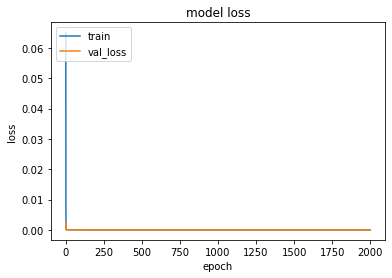

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

FEM: end displacement is 68.75 mm, rotation 5.909 deg
MBD: end displacement is 68.05 mm, rotation 5.86 deg
1001


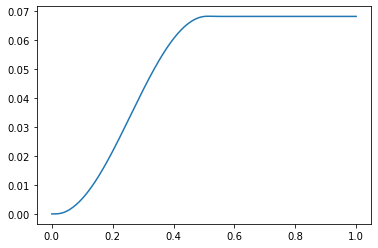

In [7]:
### Creating testing data ###
n_elem = 40
l = 1
h = 0.02
E = 2e11
nu = 0.3
rho = 7801


testvals = cbe.generate(n_elem, l, h, E, nu, rho, Fy=550) ## Generating testing data##
dframe2 = pd.DataFrame() ##Creating Pandas DF from data ##

for i in range(len(testvals[0])):
       dframe2[i] = pd.DataFrame(testvals[0][i])
        
dframe2[50] = pd.DataFrame(testvals[1])





timeframe = pd.DataFrame(range(len(testvals[1]+1)), columns=["Time"]) ## For plotting resutlts




Y2 = dframe2[50]
X2 = dframe2



32/32 [==============================] - 0s 297us/step - loss: 3.2609e-08
3.260941028315756e-08


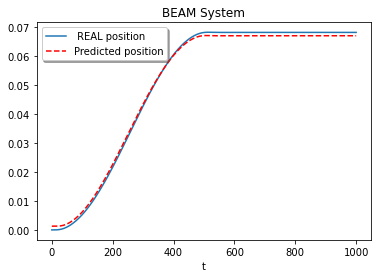

In [8]:
#### Test ####
#np.set_printoptions(threshold=sys.maxsize)
results = model.evaluate(X, Y)
print(results)

displac_pred = [] ## List for predictions
#for row in X2.itertuples(): ## Iterates trough test set getting predictions

xr = model.predict(np.array(X2))
#print(xr)
#y_pred.append(float(xr[-1]))

for row in range(xr.shape[0]):
    displac_pred.append(xr[row][50])

plt.plot(timeframe, Y2)
plt.plot(timeframe, displac_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('BEAM System')
plt.show()

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)